In [32]:
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
def get_features(datas, labels):
    f = open(datas, 'r')
    f2 = open(labels, 'r')
    X = []
    for data in f:
        data = data.split()
        temp = np.zeros((len(data)))
        for i in range(0, len(temp)):
            temp[i] = float(data[i])
        X.append(temp)
    Y = []
    for data in f2:
        data = data.split()
        temp = np.zeros((len(data)))
        for i in range(0, len(temp)):
            temp[i] = float(data[i])
        Y.append(temp)
    return np.asarray(X), np.asarray(Y)

In [39]:
def satisfied_data_without_validation(x_train, x_test, y_train, y_test):

    # ------------ decision tree ------------- #
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train, y_train.ravel())
    clf_pred_test = clf.predict(x_test)
    f1_arbre = sklearn.metrics.f1_score(clf_pred_test, y_test, average='macro')

    # ------------ random forest ------------- #
    clf_forest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators= 500)
    clf_forest.fit(x_train, y_train.ravel())
    clf_forest_pred_test = clf_forest.predict(x_test)
    f1_rf = sklearn.metrics.f1_score(clf_forest_pred_test, y_test, average='macro')

    # ------------ Naives Bayes Multinomial ------------- #
    nbm = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    nbm.fit(x_train, y_train.ravel())
    nbm_pred_test = nbm.predict(x_test)
    f1_nbm = sklearn.metrics.f1_score(nbm_pred_test, y_test, average='macro')
    
    return [f1_arbre, f1_rf, f1_nbm]


def satisfied_data_with_validation(X, y):
    # ------------ decision tree ------------- #
    clf_arbre = DecisionTreeClassifier(random_state=0)
    score = cross_val_score(clf_arbre, X, y.ravel(), scoring = 'f1_weighted', cv = 5)
    f1_arbre = score.mean()

    # ------------ random forest ------------- #
    clf_forest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=500)
    score = cross_val_score(clf_forest, X, y.ravel(), scoring='f1_weighted', cv=5)
    f1_rf = score.mean()

    # ------------ Naives Bayes Multinomial ------------- #
    nbm = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    score = cross_val_score(nbm, X, y.ravel(), scoring='f1_weighted', cv=5)
    f1_nbm = score.mean()

    return [f1_arbre, f1_rf, f1_nbm]

In [40]:
# ---------------------------- split data into 1k, 5k, 10k, 30k, 40k, 60k ---------------------------- #
x_train, y_train = get_features('cifar_train.data', 'cifar_train.solution')
x_test, y_test = get_features('cifar_test.data', 'cifar_test.solution')
x_valid, y_valid = get_features('cifar_validation.data', 'cifar_validation.solution')

sss = StratifiedShuffleSplit(n_splits=1, test_size=1.0/6, random_state=0)

# --- data 60k --- #
X = np.vstack((x_train, x_test))
X = np.vstack((X, x_valid))

y = np.vstack((y_train, y_test))
y = np.vstack((y, y_valid))

for train_index, test_index in sss.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

# --- data 1k --- #
sss_1k = StratifiedShuffleSplit(n_splits=1, test_size=1.0/60, random_state=0)

for train_index, test_index in sss_1k.split(X, y):
    X_1k = X[test_index]
    y_1k = y[test_index]

for train_index, test_index in sss.split(X_1k, y_1k):
    X_1k_train = X_1k[train_index]
    X_1k_test = X_1k[test_index]

    y_1k_train = y_1k[train_index]
    y_1k_test = y_1k[test_index]
# --- data 5k --- #
sss_5k = StratifiedShuffleSplit(n_splits=1, test_size=5.0 / 60, random_state=0)

for train_index, test_index in sss_5k.split(X, y):
    X_5k = X[test_index]
    y_5k = y[test_index]

for train_index, test_index in sss.split(X_5k, y_5k):
    X_5k_train = X_5k[train_index]
    X_5k_test = X_5k[test_index]

    y_5k_train = y_5k[train_index]
    y_5k_test = y_5k[test_index]

# --- data 10k --- #
sss_10k = StratifiedShuffleSplit(n_splits=1, test_size=10.0 / 60, random_state=0)

for train_index, test_index in sss_10k.split(X, y):
    X_10k = X[test_index]
    y_10k = y[test_index]

for train_index, test_index in sss.split(X_10k, y_10k):
    X_10k_train = X_10k[train_index]
    X_10k_test = X_10k[test_index]

    y_10k_train = y_10k[train_index]
    y_10k_test = y_10k[test_index]
# --- data 30k --- #
sss_30k = StratifiedShuffleSplit(n_splits=1, test_size=30.0 / 60, random_state=0)

for train_index, test_index in sss_30k.split(X, y):
    X_30k = X[test_index]
    y_30k = y[test_index]

for train_index, test_index in sss.split(X_30k, y_30k):
    X_30k_train = X_30k[train_index]
    X_30k_test = X_30k[test_index]

    y_30k_train = y_30k[train_index]
    y_30k_test = y_30k[test_index]
# --- data 40k --- #
sss_40k = StratifiedShuffleSplit(n_splits=1, test_size=40.0 / 60, random_state=0)

for train_index, test_index in sss_40k.split(X, y):
    X_40k = X[test_index]
    y_40k = y[test_index]

for train_index, test_index in sss.split(X_40k, y_40k):
    X_40k_train = X_40k[train_index]
    X_40k_test = X_40k[test_index]

    y_40k_train = y_40k[train_index]
    y_40k_test = y_40k[test_index]

In [42]:
score_arbre = []
score_rf = []
score_nbm = []

score_1k = satisfied_data_with_validation(X_1k, y_1k)
score_arbre.append(score_1k[0])
score_rf.append(score_1k[1])
score_nbm.append(score_1k[2])

score_5k = satisfied_data_with_validation(X_5k, y_5k)
score_arbre.append(score_5k[0])
score_rf.append(score_5k[1])
score_nbm.append(score_5k[2])

score_10k = satisfied_data_with_validation(X_10k, y_10k)
score_arbre.append(score_10k[0])
score_rf.append(score_10k[1])
score_nbm.append(score_10k[2])

score_30k = satisfied_data_with_validation(X_30k, y_30k)
score_arbre.append(score_30k[0])
score_rf.append(score_30k[1])
score_nbm.append(score_30k[2])

score_40k = satisfied_data_with_validation(X_40k, y_40k)
score_arbre.append(score_40k[0])
score_rf.append(score_40k[1])
score_nbm.append(score_40k[2])

score_60k = satisfied_data_with_validation(X, y)
score_arbre.append(score_60k[0])
score_rf.append(score_60k[1])
score_nbm.append(score_60k[2])

In [44]:
print "The f1-score of decision tree with 1k,5k,10k,30k,40k,60k: ", score_arbre, '\n'

print "The f1-score of random forest with 1k,5k,10k,30k,40k,60k: ", score_rf, '\n'

print "The f1-score of naive bayes multinomial with 1k,5k,10k,30k,40k,60k: ", score_nbm, '\n'

The f1-score of decision tree with 1k,5k,10k,30k,40k,60k:  [0.75722560994740495, 0.78778154896444441, 0.79344017083956664, 0.80862108131276389, 0.81423258899382334, 0.81544482740391278] 

The f1-score of random forest with 1k,5k,10k,30k,40k,60k:  [0.82345886260484669, 0.83696942464860924, 0.83487719276030126, 0.84312092993808874, 0.84422230201923565, 0.84202022422646094] 

The f1-score of naive bayes multinomial with 1k,5k,10k,30k,40k,60k:  [0.8655112403916434, 0.87476276353147286, 0.87580205490152419, 0.88035610409181686, 0.88067166729988566, 0.88114672500705049] 



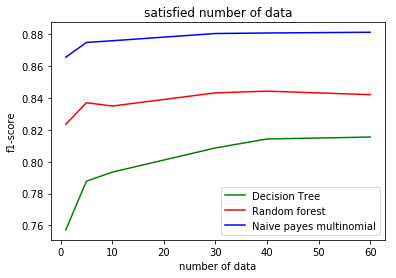

In [45]:
x = [1, 5, 10, 30, 40, 60]

plt.plot(x, score_arbre, "g", label="Decision Tree")
plt.plot(x, score_rf, "r", label="Random forest")
plt.plot(x, score_nbm, "b", label="Naive payes multinomial")

plt.xlabel("number of data")
plt.ylabel("f1-score")
plt.title("satisfied number of data")

plt.legend()
plt.show()